# Ionisation potential of a bulk material

In this example we use `MacroDensity` with `VASP` to align the energy levels of a simple bulk material.

The procedure involves two DFT calculations, yielding different quantities:

* **A bulk calculation**, this provides us with the VBM eigenvalue under the assumption of zero potential ($\epsilon_{vbm}$)
* **A slab calculation**, this provides us with the vacuum level with resepct to the potential inside the material, the difference between these values is the surface dipole ($D_s$).

The ionisation potential ($IP$) is then obtained from:

$IP = D_s - \epsilon_{vbm}$

In [1]:
%matplotlib inline
import sys
import macrodensity as md
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import os

## Bulk calculation

First, we calculate the eigenvalues of the bulk material, under the assumption of zero average potential.

In `VASP`, the eigenvalues are printed after the line ``"band No.  band energies     occupation"`` in the `OUTCAR`. We can use the function `macrodensity.io.get_band_extrema` to extract these values:

In [36]:
e_vbm, e_cbm = md.io.get_band_extrema('OUTCAR_Bi2O3_bulk')
print("Band edges from bulk calculation of Bi2O3:")
print("VBM:", e_vbm, "eV", "CBM:", e_cbm, "eV")

Band edges from bulk calculation of Bi2O3:
VBM: 5.8208 eV CBM: 7.9635 eV


## Slab calculation

Now we do a calculation of the slab (as illustrated below) to get the potential profile. Note that we need to set the `LVHAR` keyword in the `INCAR` file:

```
    LVHAR = .TRUE.  # This generates a LOCPOT file with the potential 
``` 
The `LOCPOT` file obtained with this calculation is stored in the current directory as `LOCPOT_Bi2O3.vasp`. This is the one we will use to analyse the potential and extract the vacuum level and the surface dipole.

![](./MoO3.png)

In [8]:
if os.path.isfile('LOCPOT.BiO3.vasp'):
    print('LOCPOT already exists')
else:
    os.system('bunzip2 LOCPOT_Bi2O3.vasp.bz2')

Reading header information...
Reading 3D data using Pandas...
Average of the potential =  -5.5331031601624006e-15
Average of the average =  -1.0827317878249145e-14


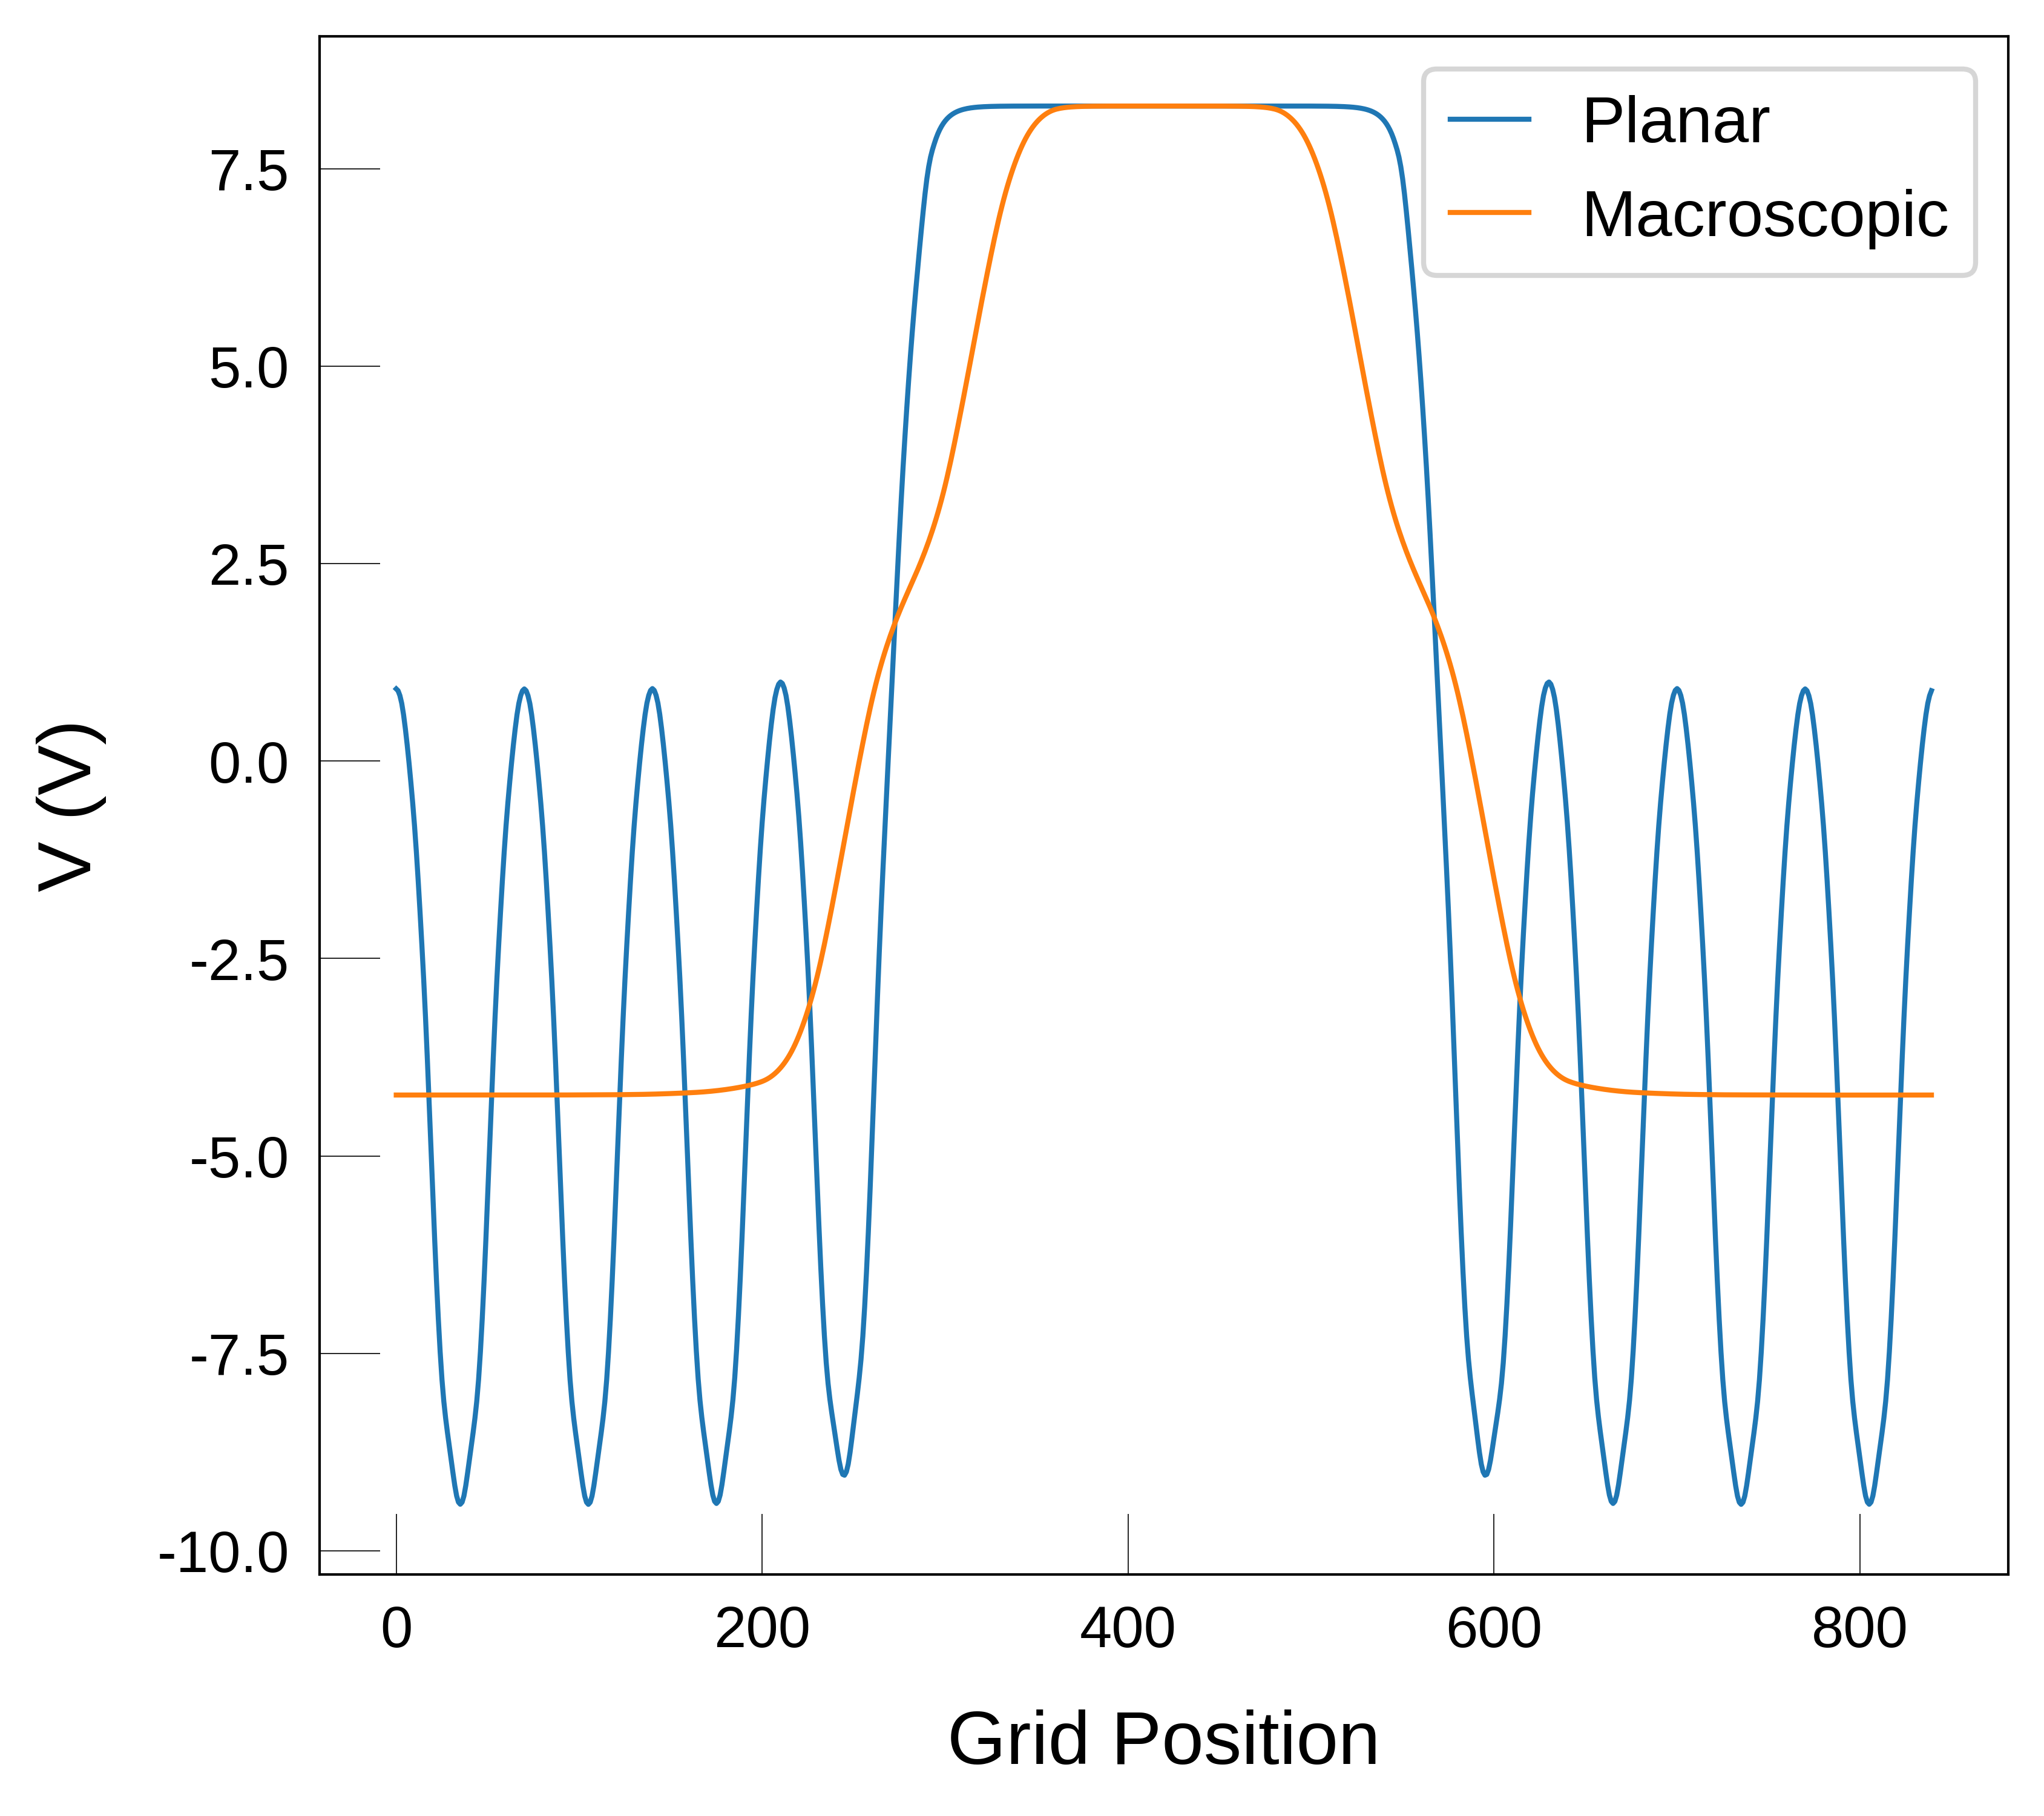

In [27]:
input_file = 'LOCPOT_Bi2O3.vasp'
# The lattice_vector is the periodicity of the slab in the direction normal to the surface. 
# In the picture above, this is just the distance between the layers of BiO3.
lattice_vector = 7.45
output_file = 'planar.dat'

# To perform average along the z-axis, we set axis='z'
df, fig = md.plot_planar_average(
    input_file=input_file,
    output_file=output_file,
    lattice_vector=lattice_vector,
    axis='z',
)

```{tip}
Sometimes the macroscopic average potential in the slab still looks very wavey. In this case it is sometimes required to increase the `lattice_vector` setting since there are sometimes numerical effects. 
```

### Get the surface dipole ($D_s$)

From looking at the macroscopic average in the plot above and the generated dataframe we find that the value of $V$ at each plateau is:

In [33]:
max_mac = df.Macroscopic.max()
min_mac = df.Macroscopic.min()

print("Values of V at the plateaus:", round(min_mac, 2), "V and", round(max_mac, 2), "V")

Values of V at the plateaus: -4.23 V and 8.29 V


So the step $D_s$ is 

In [34]:
D_s = max_mac - min_mac
print("D_s:", round(D_s, 2), "V")

D_s: 12.52 V


Applying the equation from earlier, the IP is 

In [38]:
ip = D_s - e_vbm
print(f"IP: {round(ip, 2)} eV")

IP: 6.7 eV
